In [1]:
from sympy import diff
from sympy import sympify
from matplotlib import pyplot as plt

**1. Implemente uma funcão que receba o string com a expressão de f(x), um
número real *a*, e retorne o valor de f(*a*). (Dica: em Python, você pode usar
a biblioteca sympy com as funções sympify e subs.)**

In [2]:
def funcaoString(funcao, a):

    fx = sympify(funcao)
    fa = fx.subs('x', a)
    return fa

f = 'x^3 + x^2 - 2*x + 1'
a = 3.0
print(funcaoString(f, a))

31.0000000000000


**2. Usando a função implementada na questão anterior, implemente um programa que receba uma string com a expressão de uma função qualquer, um intervalo [a, b], e uma quantidade de amostras *n*, e plote seu gráfico. Ilustre seu funcionamento com 3 gráficos de funções distintas.**

In [3]:
def plotarGrafico(funcao, a, b, n):
    
    x = []
    y = []
    delta = (b - a) / n

    while a <= b:
        x.append(a)
        y.append(funcaoString(funcao, a))
        a += delta

    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(funcao)
    plt.show()

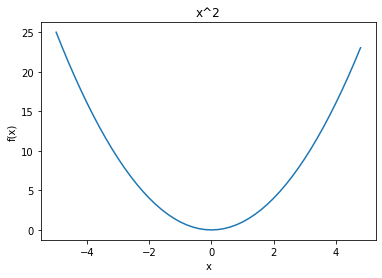

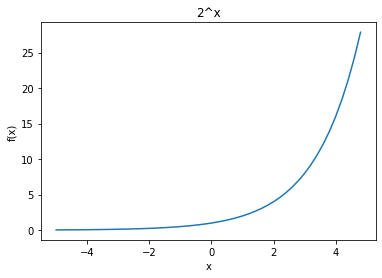

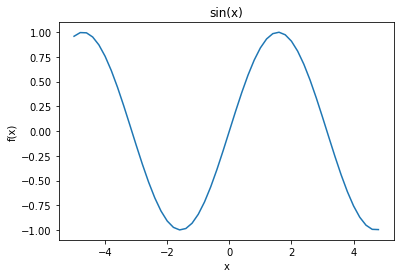

In [4]:
plotarGrafico('x^2', -5, 5, 50)
plotarGrafico('2^x', -5, 5, 50)
plotarGrafico('sin(x)', -5, 5, 50)

**3. Implemente uma função que calcule a derivada em cada ponto da amostra
de uma função dada como string, usando 3 pontos. Plote a função derivada
obtida dessa maneira junto com o gráfico da função (como implementado na
questão 2). Ilustre seu funcionamento com 3 gráficos de derivadas de funções
distintas.**

In [5]:
def calcularDerivadaCom3pontos(funcao, x0, h):
    return (funcaoString(funcao, x0+h) - funcaoString(funcao, x0-h)) / (2*h)

In [6]:
def plotarGraficoDerivada(funcao, a, b, n):
    
    x = []
    y = []
    y_der = []
    delta = (b - a) / n

    while a <= b:
        x.append(a)
        y.append(funcaoString(funcao, a))
        y_der.append(calcularDerivadaCom3pontos(funcao, a, 10**-4))
        a += delta

    plt.plot(x, y)
    plt.plot(x, y_der)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(['Função', 'Derivada'])
    plt.show()

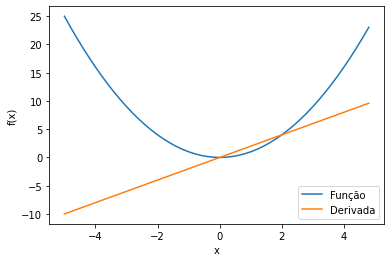

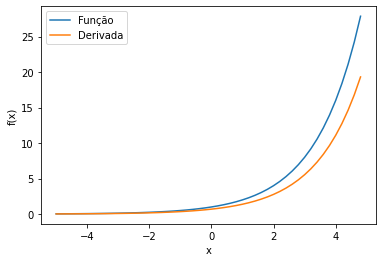

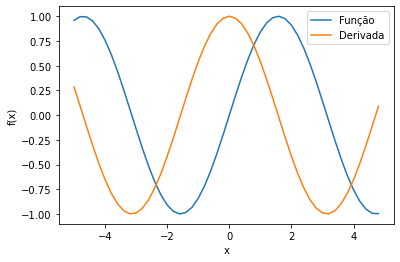

In [7]:
plotarGraficoDerivada('x^2', -5, 5, 50)
plotarGraficoDerivada('2^x', -5, 5, 50)
plotarGraficoDerivada('sin(x)', -5, 5, 50)

**4. Plote e compare o gráfico da derivada obtida numericamente na questão
anterior, com o gráfico da derivada exata. (Dica: use a função diff do pacote
sympy para obter a expressão de uma derivada).**

In [8]:
def calcularDerivadaExata(funcao, a):
    fx = sympify(funcao)
    return diff(fx, 'x').subs('x', a)

In [9]:
def plotarComparacao(funcao, a, b, n):
    
    x = []
    y_der = []
    y_diff = []
    delta = (b - a) / n

    while a <= b:
        x.append(a)
        y_der.append(calcularDerivadaCom3pontos(funcao, a, 10**-4))
        y_diff.append(calcularDerivadaExata(funcao, a))
        a += delta

    plt.plot(x, y_diff, lw = 3, color = 'black')
    plt.scatter(x, y_der)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Derivada(' + funcao + ')')
    plt.legend(['Método','Exata'])
    plt.show()

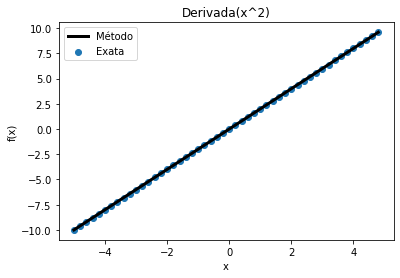

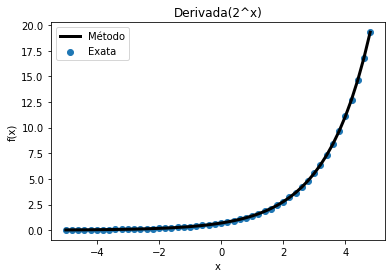

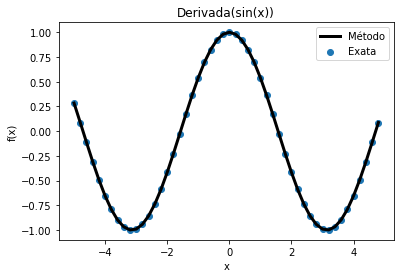

In [10]:
plotarComparacao('x^2', -5, 5, 50)
plotarComparacao('2^x', -5, 5, 50)
plotarComparacao('sin(x)', -5, 5, 50)

**5. Implemente uma função que calcule a integral definida usando a amostra
de uma função dada como string, e seu intervalo de integração [a, b]. Com
este objetivo, use a regra de Simpson composta, especificando a quantidade de subintervalos *n* como parâmetro de entrada. Ilustre seu funcionamento com 3 gráficos de funções distintas, e 3 valores de *n* distintos em cada caso.**

In [11]:
def regraSimpsonComposta(funcao, a, b, n):

    h = (b-a)/n
    x0 = funcaoString(funcao, a) + funcaoString(funcao, b)
    x1 = x2 = 0

    for i in range(1, n):
        x = a + i * h
    if i % 2 == 0:
        x2 += funcaoString(funcao, x)
    else:
        x1 += funcaoString(funcao, x)

    return (x0 + 2*x2 + 4*x1) * h / 3

n = 10: 12.6666666666667


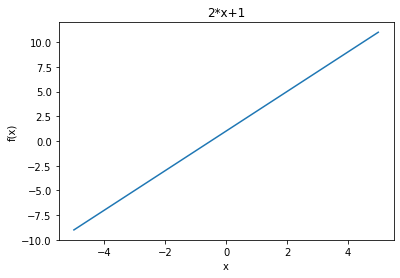

n = 50: 2.96000000000000


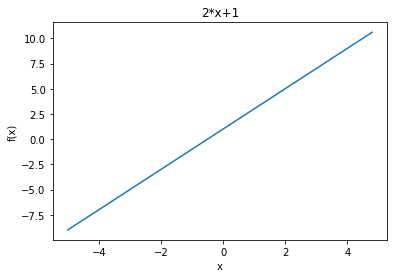

n = 200: 0.760000000000000


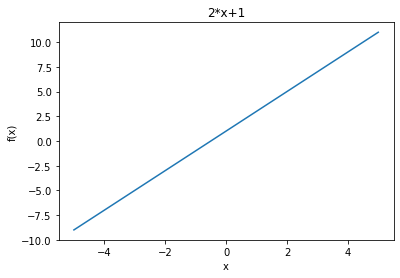

In [12]:
f1 = '2*x+1'
f2 = '3*x^2'
f3 = 'cos(x)'

a, b = -5, 5
n1, n2, n3 = 10, 50, 200

print(f'n = {n1}: {regraSimpsonComposta(f1, a, b, n1)}')
plotarGrafico(f1, a, b, n1)
print(f'n = {n2}: {regraSimpsonComposta(f1, a, b, n2)}')
plotarGrafico(f1, a, b, n2)
print(f'n = {n3}: {regraSimpsonComposta(f1, a, b, n3)}')
plotarGrafico(f1, a, b, n3)

n = 10: 114.000000000000


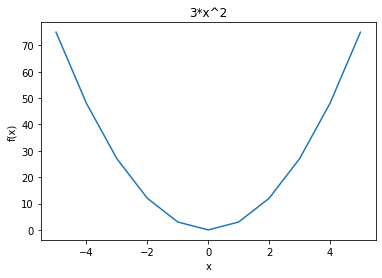

n = 50: 28.4320000000000


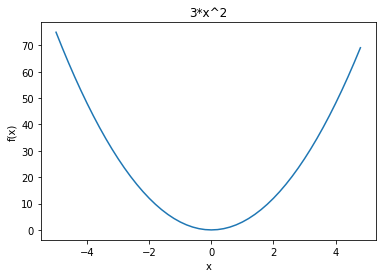

n = 200: 7.40050000000000


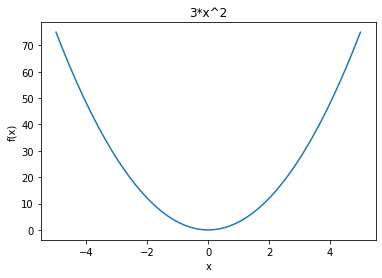

In [13]:
print(f'n = {n1}: {regraSimpsonComposta(f2, a, b, n1)}')
plotarGrafico(f2, a, b, n1)
print(f'n = {n2}: {regraSimpsonComposta(f2, a, b, n2)}')
plotarGrafico(f2, a, b, n2)
print(f'n = {n3}: {regraSimpsonComposta(f2, a, b, n3)}')
plotarGrafico(f2, a, b, n3)

n = 10: -0.871524827818149 + 0.666666666666667*cos(5)


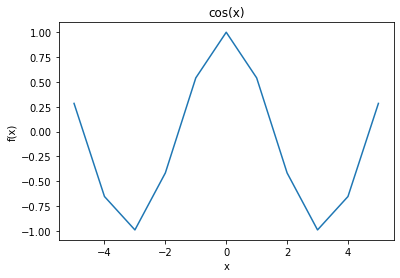

n = 50: 0.0233330622505193 + 0.133333333333333*cos(5)


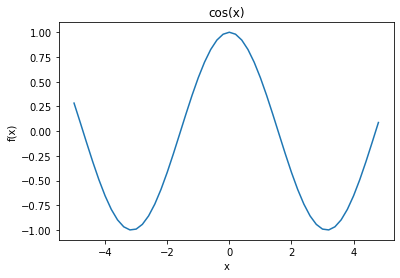

n = 200: 0.0333333333333333*cos(5) + 0.0156920961969635


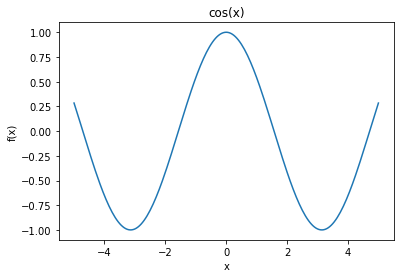

In [14]:
print(f'n = {n1}: {regraSimpsonComposta(f3, a, b, n1)}')
plotarGrafico(f3, a, b, n1)
print(f'n = {n2}: {regraSimpsonComposta(f3, a, b, n2)}')
plotarGrafico(f3, a, b, n2)
print(f'n = {n3}: {regraSimpsonComposta(f3, a, b, n3)}')
plotarGrafico(f3, a, b, n3)